In [11]:
import pandas as pd
from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib import pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer

df = pd.read_csv("path/to/data/features_n-grams_merged.csv")

In [12]:
df['Combined_words']= df['uni-grams']+','+df['Bi-grams']
df

,qs_ranking,institution,focus,location,continent,year_established,private_public,type,strategy_start,strategy_end,filename,pdf,uni-grams,Bi-grams,Combined_words
0,102,University of Wisconsin-Madison,FC,United States,North America,1848.0,public,all,2023.0,2028.0,1.txt,1,"university, student, system, support, increase...","final approved, page final, percentage point, ...","university, student, system, support, increase..."
1,103,The Pontifical Catholic University of Chile,FC,Chile,South America,1888.0,private,all,2020.0,2025.0,2.txt,1,"university, academic, development, community, ...","vice president, office vice, university superi...","university, academic, development, community, ..."
2,104,The University of Sheffield,FC,United Kingdom,Europe,1905.0,public,all,2021.0,2025.0,3.txt,1,"college, student, plan, learning, people, skil...","strategic plan, plan college, south mayoral, c...","college, student, plan, learning, people, skil..."
3,105,Uppsala University,FC,Sweden,Europe,1477.0,public,all,2019.0,NaN,4.txt,1,"university, research, education, quality, stud...","education research, university university, uni...","university, research, education, quality, stud..."
4,107,University of Copenhagen,FC,Denmark,Europe,1479.0,public,all,2023.0,2030.0,5.txt,1,"university, research, strategy, new, education...","university strategy, research education, lifel...","university, research, strategy, new, education..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
248,387,Belarusian State University,FO,Belarus,Europe,1921.0,public,all,2011.0,2015.0,Belarusian State University.txt,1,"international, project, university, management...","project idea, state university, university man...","international, project, university, management..."
249,392,Institut National des sciences AppliquÃ©es de ...,FO,France,Europe,1957.0,public,all,2023.0,2023.0,Institut National des sciences AppliquÃ©es de ...,1,NaN,NaN,NaN
250,392,South China University of Technology,CO,China,Asia,1952.0,public,all,2023.0,2023.0,South China University of Technology.txt,1,"student, program, teaching, international, lan...","international student, english teaching, b eng...","student, program, teaching, international, lan..."
251,396,Justus-Liebig-University Giessen,FC,Germany,Europe,1607.0,public,all,2024.0,2025.0,Justus-Liebig-University Giessen.txt,1,"research, development, university, teaching, a...","study teaching, executive board, gender equali...","research, development, university, teaching, a..."


In [13]:
df = df.dropna()

In [14]:
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(df['Combined_words'])

## DBSCAN 

In [19]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.5, min_samples=2)  
dbscan_clusters = dbscan.fit_predict(tfidf_matrix.toarray())

df['DBSCAN_Cluster'] = dbscan_clusters

# Printing out the universities and their rankings for each DBSCAN cluster
unique_clusters = set(dbscan_clusters)
for cluster in unique_clusters:
    cluster_universities = df[df['DBSCAN_Cluster'] == cluster][['institution', 'qs_ranking']]  # Adjust column names accordingly
    print(f"DBSCAN Cluster {cluster}:")
    print(cluster_universities)
    print("\n")

DBSCAN Cluster 0:
                    institution  qs_ranking
14   King Abdulaziz University          143
121        King Saud University         203


DBSCAN Cluster 1:
                institution  qs_ranking
51                     EPFL          36
131  University of Lausanne         220


DBSCAN Cluster 2:
                                 institution  qs_ranking
62                The University of Auckland          68
167  Auckland University of Technology (AUT)         407


DBSCAN Cluster 3:
                          institution  qs_ranking
88                 Sabanci University         526
171  The American University in Cairo         415


DBSCAN Cluster -1:
                                     institution  qs_ranking
0               University of Wisconsin-Madison          102
1    The Pontifical Catholic University of Chile         103
2                    The University of Sheffield         104
4                       University of Copenhagen         107
5                 Unive

C:\Users\BENIKA~1\AppData\Local\Temp/ipykernel_25260/1810728327.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['DBSCAN_Cluster'] = dbscan_clusters


## Agglomerative Hierarchical Clustering

In [15]:
Z = linkage(tfidf_matrix.toarray(), 'ward')

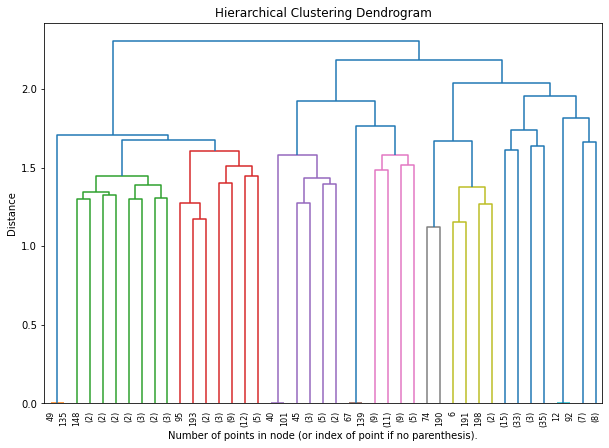

In [16]:
plt.figure(figsize=(10, 7))
plt.title('Hierarchical Clustering Dendrogram')
dendrogram(Z, truncate_mode='level', p=5)  # `truncate_mode` and `p` are optional parameters to truncate the dendrogram
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.ylabel("Distance")
plt.show()

In [26]:
from sklearn.cluster import AgglomerativeClustering

k=5 #looking at the dendogram

agglomerative = AgglomerativeClustering(n_clusters=k, affinity='euclidean', linkage='ward')  
agglomerative_clusters = agglomerative.fit_predict(tfidf_matrix.toarray())

df['Agglomerative_Cluster'] = agglomerative_clusters

# Printing out the universities and their rankings for each Agglomerative cluster
for i in range(k):
    cluster_universities = df[df['Agglomerative_Cluster'] == i][['institution', 'qs_ranking']]  
    print(f"Agglomerative Cluster {i}:")
    print(cluster_universities)
    print("\n") 

Agglomerative Cluster 0:
                                           institution  qs_ranking
1          The Pontifical Catholic University of Chile         103
4                             University of Copenhagen         107
10                  Eindhoven University of Technology         124
13                         Sapienza University of Rome         134
18                                   Aarhus University         143
43   ETH Zurich - Swiss Federal Institute of Techno...           7
51                                                EPFL          36
52                      Technical University of Munich          37
54                      Delft University of Technology          47
56                             University of Amsterdam          53
58   KAIST - Korea Advanced Institute of science & ...          56
72                                     Lund University          85
78                           Freie Universitaet Berlin          98
88                                  S

C:\Users\BENIKA~1\AppData\Local\Temp/ipykernel_31604/3447891369.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Agglomerative_Cluster'] = agglomerative_clusters


In [27]:
# Printing different agglomerative clusters with different categories
for i in range(k):
    cluster_universities = df[df['Agglomerative_Cluster'] == i][['location','continent']]  
    print(f"Agglomerative Cluster {i}:")
    print(cluster_universities)
    print("\n") 

Agglomerative Cluster 0:
           location      continent
1             Chile  South America
4           Denmark         Europe
10      Netherlands         Europe
13            Italy         Europe
18          Denmark         Europe
43      Switzerland         Europe
51      Switzerland         Europe
52          Germany         Europe
54      Netherlands         Europe
56      Netherlands         Europe
58      South Korea           Asia
72           Sweden         Europe
78          Germany         Europe
88           Turkey           Asia
92           Greece         Europe
94        Argentina  South America
100         Belgium         Europe
104  Czech Republic         Europe
109          Poland         Europe
112         Austria         Europe
129          Israel           Asia
131     Switzerland         Europe
135         Germany         Europe
141         Germany         Europe
142  Czech Republic         Europe
143         Belgium         Europe
144           Italy         Eu

In [35]:
for i in range(k):
    cluster_universities = df[df['Agglomerative_Cluster'] == i][['type']]  
    print(f"Agglomerative Cluster {i}:")
    print(cluster_universities)
    print("\n") 

Agglomerative Cluster 0:
              type
1              all
4              all
10   technological
13             all
18             all
43   technological
51   technological
52   technological
54   technological
56             all
58   technological
72             all
78             all
88             all
92             all
94             all
100  technological
104  technological
109  technological
112            all
129            all
131            all
135            all
141  technological
142            all
143            all
144  technological
148            all
153  technological
161            all
162            all
163            all
166            all
171            all
173            all
176            all
184            all
192            all
208            all
215            all
216            all
220            all
222            all
226            all
233            all
239            all
240            all
248            all
251            all


Agglomerative Cluster 1

In [20]:
df['type'].unique()

array(['all', 'technological', 'research', 'business', 'science'],
      dtype=object)

In [36]:
for i in range(k):
    cluster_universities = df[df['Agglomerative_Cluster'] == i][['year_established']]  
    print(f"Agglomerative Cluster {i}:")
    print(cluster_universities)
    print("\n") 

Agglomerative Cluster 0:
     year_established
1              1888.0
4              1479.0
10             1956.0
13             1303.0
18             1928.0
43             1855.0
51             1969.0
52             1868.0
54             1842.0
56             1632.0
58             1971.0
72             1666.0
78             1948.0
88             1999.0
92             1973.0
94             1897.0
100            1971.0
104            1952.0
109            1826.0
112            1970.0
129            1956.0
131            1537.0
135            1734.0
141            1877.0
142            1348.0
143            1852.0
144            1859.0
148            1816.0
153            1959.0
161            1919.0
162            1973.0
163            1531.0
166            1908.0
171            1919.0
173            1538.0
176            1978.0
184            1898.0
192            1707.0
208            1920.0
215            1364.0
216            2005.0
220            1829.0
222            1998.0
226    

In [28]:
# Quantifying the constituent continents for each cluster in percentages 
cluster_location_counts = df.groupby(['Agglomerative_Cluster', 'continent']).size()
cluster_location_percentages = cluster_location_counts.groupby(level=0).apply(lambda x: 100 * x / float(x.sum()))
print(cluster_location_percentages)

Agglomerative_Cluster  continent    
0                      Africa            6.122449
                       Asia             16.326531
                       Europe           73.469388
                       South America     4.081633
1                      Africa            3.488372
                       Asia             37.209302
                       Australia         1.162791
                       Europe           36.046512
                       North America    18.604651
                       Oceania           3.488372
2                      Asia             11.764706
                       North America    88.235294
3                      Asia             14.285714
                       Europe           71.428571
                       North America    14.285714
4                      Asia             19.230769
                       Australia        13.461538
                       Europe           46.153846
                       North America     7.692308
             

In [ ]:
# tried agglomerative with different number of clusters as well, k=3,4,6---but these were not even showing clear separation in location which the k=5 shows

In [23]:
# Visualizing the data or universities and any clusters in 2D
from sklearn.manifold import TSNE

tsne_model = TSNE(n_components=2, verbose=1, random_state=42, n_iter=300)
tsne_tfidf = tsne_model.fit_transform(tfidf_matrix.toarray())

C:\Anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 211 samples in 0.002s...
[t-SNE] Computed neighbors for 211 samples in 0.008s...
[t-SNE] Computed conditional probabilities for sample 211 / 211
[t-SNE] Mean sigma: 0.247596
[t-SNE] KL divergence after 250 iterations with early exaggeration: 70.654778
[t-SNE] KL divergence after 300 iterations: 1.470692


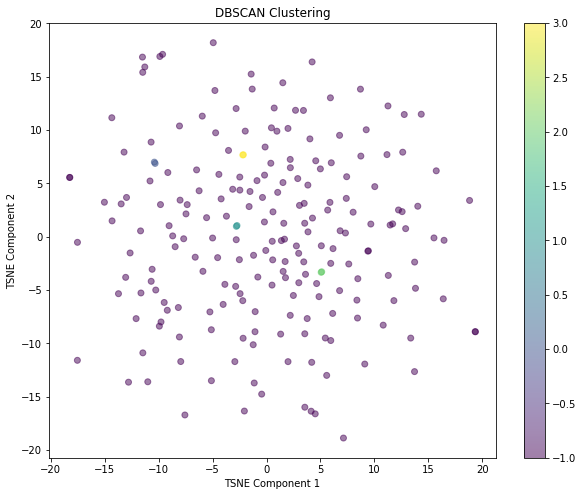

In [24]:
# DBSCAN clusters
plt.figure(figsize=(10, 8))
plt.scatter(tsne_tfidf[:, 0], tsne_tfidf[:, 1], c=df['DBSCAN_Cluster'], cmap='viridis', marker='o', alpha=0.5)
plt.title('DBSCAN Clustering')
plt.xlabel('TSNE Component 1')
plt.ylabel('TSNE Component 2')
plt.colorbar()
plt.show()

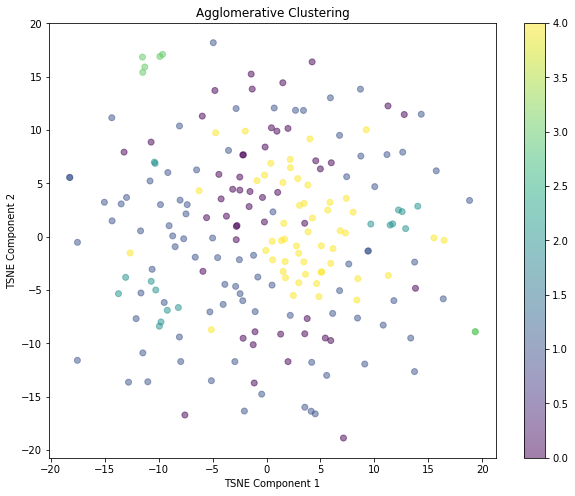

In [25]:
# Plot for Agglomerative clusters
plt.figure(figsize=(10, 8))
plt.scatter(tsne_tfidf[:, 0], tsne_tfidf[:, 1], c=df['Agglomerative_Cluster'], cmap='viridis', marker='o', alpha=0.5)
plt.title('Agglomerative Clustering')
plt.xlabel('TSNE Component 1')
plt.ylabel('TSNE Component 2')
plt.colorbar()
plt.show()
